In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy.stats as stats

from math import factorial

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1.
Cowboy Marlboro likes to go to the shooting range. 

His best result in a five-shot series is 47 points. 

What is the probability of repeating the record if, on average, he shoots 
- into the 10 in 30% of cases, 
- into the 9 — in 40% of cases, 
- into the 8 — in 20% of cases, 
- into the 7 — in 5% of cases, 
- into the range 0-6 in 5% of cases?

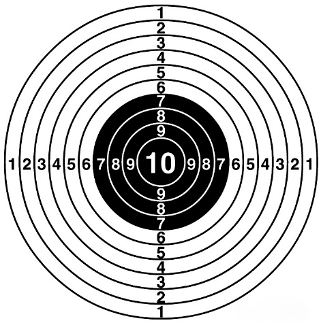

### Combination options

- First - (10, 10, 10, 10, 7)
- Second - (10, 10, 10, 9, 8)
- Third - (10, 10, 9, 9, 9)

**There could not be other options, because:**

In [4]:
# If I will take value 0-6 and the highest values - the result is less than 47
6+10+10+10+10

46

In [5]:
# If I take these values - the result is more than 47
10+10+10+9+9

48

In [6]:
# If I will take these values - the result is less than 47
10+10+10+8+8

46

In [7]:
# the result is less than 47
10+10+9+9+8

46

### 1. Math Solution

**Probabilities of options**

In [8]:
# Probability of First combination - (10, 10, 10, 10, 7)
(0.3**4)*0.05

0.000405

In [9]:
# Probability of Second combination - (10, 10, 10, 9, 8)
(0.3**3)*0.4*0.2

0.00216

In [10]:
# Probability of Third combination - (10, 10, 9, 9, 9)
(0.3**2)*(0.4**3)

0.005760000000000001

**We need to use multinomial coefficients to count the number of combinations** 

In [11]:
def multinomial2(k1, k2):
    return factorial(k1+k2) /(factorial(k1)*factorial(k2))

In [12]:
def multinomial3(k1, k2, k3):
    return factorial(k1+k2+k3) /(factorial(k1)*factorial(k2)* factorial(k3))

In [13]:
# First combination - (10, 10, 10, 10, 7)
multinomial2(4,1)

5.0

In [14]:
# Second combination - (10, 10, 10, 9, 8)
multinomial3(1,1,3)

20.0

In [15]:
# Third combination - (10, 10, 9, 9, 9)
multinomial2(2,3)

10.0

In [16]:
((0.3**4)*0.05 * 5) + ((0.3**3)*0.4*0.2 * 20) + ((0.3**2)*(0.4**3) * 10)

0.10282500000000001

**10% is the probability of repeating the record**

### 2. Python Solution - simulating the task to double-check my calculations

In [17]:
sum((random.random() <= 0.4) for _ in range(10000)) / 10000

0.398

In [18]:
def shoot_score():
    r = random.random()
    if r <= 0.3:
        return 10
    elif r <= 0.7:
        return 9
    elif r <= 0.9:
        return 8
    elif r <= 0.95:
        return 7
    else:
        return 6 #doesn't matter

In [19]:
def shoots_score_5():
    return shoot_score()+shoot_score()+shoot_score()+shoot_score()+shoot_score()

In [20]:
shoots_score_5()

42

In [21]:
sum((shoots_score_5() == 47) for _ in range(1000000)) / 1000000 

0.102759

# 2.	
You received the results of the recently executed A/B test (see ab_test.zip below) to check new feature on your website (test group – with new feature, control group – current state). Can you please answer the questions:

a.	Are the results solid? Can we use the data to properly compare two groups (control, test)?

b.	Are the results successful? Would you recommend implementing the new feature?


## Downloading the data

In [22]:
ab_test = 'ab_test.csv'
df = pd.read_csv(ab_test)

In [23]:
df.head()

,user_id,test_group,created_order_in_3_days,order_sum,geo_group,marketing_group
0,1005040,control,1,5194.27,CY,target_direct
1,1069723,test,0,NaN,CY,target_direct
2,1064653,test,0,NaN,CY,target_direct
3,1063744,test,1,18940.00,CY,organic
4,1022929,control,0,NaN,DE,social_media


## General information about the data

In [24]:
df.shape

(10000, 6)

In [25]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  10000 non-null  int64  
 1   test_group               10000 non-null  object 
 2   created_order_in_3_days  10000 non-null  int64  
 3   order_sum                3177 non-null   float64
 4   geo_group                10000 non-null  object 
 5   marketing_group          10000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [26]:
for colname in df.select_dtypes(include=['object']).columns:
    print(str(colname) + '\n\n' + str(df[colname].value_counts()) + '\n' + '-' * 50 + '\n')

test_group

test_group
control    5062
test       4938
Name: count, dtype: int64
--------------------------------------------------

geo_group

geo_group
LT    6043
CY    2273
DE    1684
Name: count, dtype: int64
--------------------------------------------------

marketing_group

marketing_group
target_direct    4643
organic          3061
social_media     1246
context_brand    1050
Name: count, dtype: int64
--------------------------------------------------



<Axes: ylabel='Frequency'>

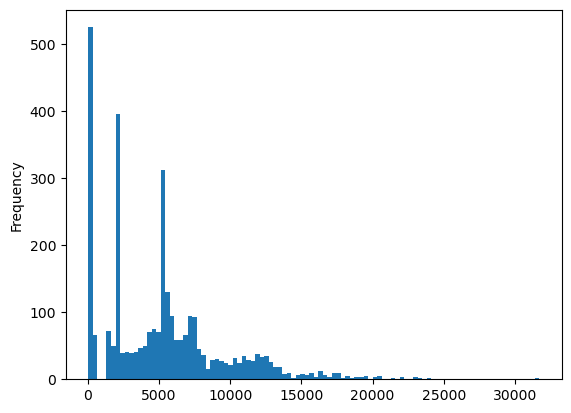

In [27]:
df['order_sum'].plot(kind='hist', bins=100)

geo_group
CY    Axes(0.125,0.11;0.775x0.77)
DE    Axes(0.125,0.11;0.775x0.77)
LT    Axes(0.125,0.11;0.775x0.77)
Name: order_sum, dtype: object

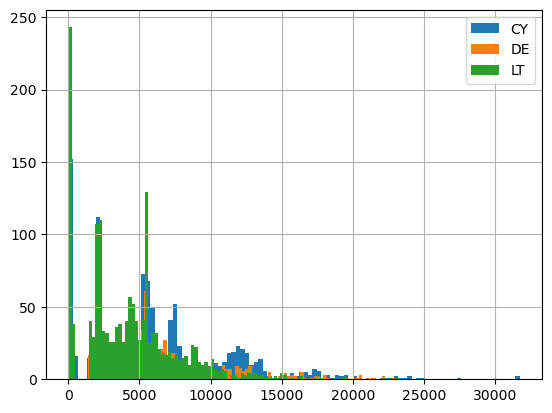

In [28]:
df.groupby('geo_group')['order_sum'].hist(bins=100, legend=True)

Each geo distributed in different way

According to distribution above - I could conclude, that users bahave in different way in each country

## Data Processing

Checking that `all users` in the test are unique 

In [29]:
df['user_id'].unique().shape[0]

10000

In [30]:
df['user_id'].shape[0]

10000

Checking that we have `order_sum` only for `created_order_in_3_days`

In [31]:
df[(df['created_order_in_3_days'] == 1) & df['order_sum'].notna()].shape

(3177, 6)

In [32]:
df[(df['created_order_in_3_days'] == 1) | df['order_sum'].notna()].shape

(3177, 6)

In [33]:
df_gr = df.groupby(by='test_group', as_index=False).agg(
    n_unq_users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
    n_paying_users=pd.NamedAgg(column='created_order_in_3_days', aggfunc='sum'),
    sum_orders=pd.NamedAgg(column='order_sum', aggfunc='sum')   
)

In [34]:
df_gr['arpu'] =  df_gr['sum_orders'] / df_gr['n_unq_users']
df_gr['arppu'] =  df_gr['sum_orders'] / df_gr['n_paying_users']
df_gr['conversion_rate'] = df_gr['n_paying_users'] / df_gr['n_unq_users']

In [35]:
df_gr['paying_share'] = df_gr['arpu'] / df_gr['arppu'] 

In [36]:
df_gr

,test_group,n_unq_users,n_paying_users,sum_orders,arpu,arppu,conversion_rate,paying_share
0,control,5062,1594,8279665.31,1635.65,5194.27,0.31,0.31
1,test,4938,1583,8523733.14,1726.15,5384.54,0.32,0.32


**Before the analysis we need to create the design of experiment for understanding what we want to measure**

## A/B Testing Experimental Design

**What the experience of the control and test groups looks like** 
- test group – with new feature 
- control group – current state

### Hypothesis 1 - comparing conversion rate (paying users / all users)
- **Null hypothesis**: Conversion rates of control and test groups don't differ
- **Key metric**: Conversion Rate =  Quantity of Paying Users / Quantity of Users

In [37]:
def conf_int(conv1, n1, conv2, n2, z):
    
    dconv = conv2 - conv1
    hlen = z * ( conv1 * (1 - conv1) / n1 + conv2 * (1 - conv2) / n2 )**0.5
    return (round(dconv - hlen, 4), round(dconv + hlen, 4))

We need to compare conversion estimates in the first and second versions so - it needed to **use methodology of confidencde intervals** to check the statistical significance between 2 conversions

In [38]:
def test_result(conf_int):
    if conf_int[0] <= 0 and 0 <= conf_int[1]:
        return 'not-significant'
    else:
        return 'significant'

In [39]:
g_contrl, g_test = df_gr['test_group']
n_contrl, n_test = df_gr['n_unq_users']
conv_contrl, conv_test = df_gr['conversion_rate']

conf_int_contrl_vs_test = conf_int(conv_contrl , n_contrl , conv_test , n_test , 1.96)

In [40]:
# test conversion(group1) vs conversion(group2)
pd.DataFrame([
    {'group1': g_contrl, 'group2': g_test, 'conv1': n_contrl, 'conv2': n_test, 'diff': n_test - n_contrl,
        'conf_int': conf_int_contrl_vs_test, 'test_result': test_result(conf_int_contrl_vs_test)}
])

,group1,group2,conv1,conv2,diff,conf_int,test_result
0,control,test,5062,4938,-124,"(-0.0126, 0.0239)",not-significant


**Conclusion:**
There is no difference in coversion of 2 groups with confidence level 95%

But I also want to compare other metrics - ARPU (average revenue per user) and ARRPU (average revenue per paying user)

### Hypothesis 2 - comparing ARPU, ARPPU

In [41]:
df.head()

,user_id,test_group,created_order_in_3_days,order_sum,geo_group,marketing_group
0,1005040,control,1,5194.27,CY,target_direct
1,1069723,test,0,NaN,CY,target_direct
2,1064653,test,0,NaN,CY,target_direct
3,1063744,test,1,18940.00,CY,organic
4,1022929,control,0,NaN,DE,social_media


In [42]:
df['order_sum'].replace(np.NaN, 0, inplace=True)

In [43]:
order_sums_control = df[df['test_group'] == 'control']['order_sum']
order_sums_test = df[df['test_group'] == 'test']['order_sum']

In [44]:
order_sums_control.mean(), order_sums_control.std(), order_sums_control.shape[0]

(1635.6509895788226, 3525.8466533915885, 5062)

In [45]:
order_sums_test.mean(), order_sums_test.std(), order_sums_test.shape[0]

(1726.1508997760225, 3531.975620083195, 4938)

I use **t-Test** in this and future cases, cause I check metrics about average

In [46]:
def t_test_1_sided(mean1, std1, n1, mean2, std2, n2, significance=0.95):
    se = (std1**2/n1 + std2**2/n2)**0.5
    df = n1 + n2 - 2
    t = abs(mean1 - mean2) / se
    t_crit = stats.t.ppf(significance, df=df)
    
    result = 'significant' if t > t_crit else 'not-significant'
    
    return {'t': t, 't_crit': t_crit, 'result': result, 'df': df, 'se': se}

In [47]:
# arpu
t_test_1_sided(
    order_sums_control.mean(), order_sums_control.std(), order_sums_control.shape[0],
    order_sums_test.mean(), order_sums_test.std(), order_sums_test.shape[0])

{'t': 1.282151069426099,
 't_crit': 1.6450060485564049,
 'result': 'not-significant',
 'df': 9998,
 'se': 70.58443607406443}

In [48]:
def stat_dict(df):
    ctrl = df[df['test_group'] == 'control']['order_sum']
    test = df[df['test_group'] == 'test'   ]['order_sum']
    
    ctrl_mean, ctrl_std, ctrl_n = ctrl.mean(), ctrl.std(), ctrl.shape[0]
    test_mean, test_std, test_n = test.mean(), test.std(), test.shape[0]
    
    t_test_result = t_test_1_sided(ctrl_mean, ctrl_std, ctrl_n, test_mean, test_std, test_n)['result']
    
    return {'ctrl_n':ctrl_n, 'test_n':test_n, 'ctrl_mean':ctrl_mean, 'test_mean':test_mean,
            't_test_result':t_test_result}

In [49]:
pd.DataFrame([stat_dict(df)])

,ctrl_n,test_n,ctrl_mean,test_mean,t_test_result
0,5062,4938,1635.65,1726.15,not-significant


**Conclusion:**
There is no difference in ARPU of 2 groups with confidence level 95%

In [50]:
paying = (df['order_sum'] > 0)
order_sums_control_paying = df[(df['test_group'] == 'control') & paying]['order_sum']
order_sums_test_paying = df[(df['test_group'] == 'test') & paying]['order_sum']

In [51]:
order_sums_control_paying.mean(), order_sums_control_paying.std(), order_sums_control_paying.shape[0]

(5194.269328260979, 4582.51621413562, 1594)

In [52]:
order_sums_test_paying.mean(), order_sums_test_paying.std(), order_sums_test_paying.shape[0]

(5384.543994373973, 4383.9998110607585, 1583)

In [53]:
# arppu
t_test_1_sided(
    order_sums_control_paying.mean(), order_sums_control_paying.std(), order_sums_control_paying.shape[0],
    order_sums_test_paying.mean(), order_sums_test_paying.std(), order_sums_test_paying.shape[0])

{'t': 1.1958869005654666,
 't_crit': 1.6453336951571815,
 'result': 'not-significant',
 'df': 3175,
 'se': 159.10757616211367}

In [54]:
pd.DataFrame([stat_dict(df[df['order_sum'] > 0])])

,ctrl_n,test_n,ctrl_mean,test_mean,t_test_result
0,1594,1583,5194.27,5384.54,not-significant


**Conclusion:**
There is no difference in ARPPU of 2 groups with confidence level 95%

**I decided to look in detail at situation in different countries**

### Hypothesis 3 - comparing  ARPU, ARPPU in groups by countries

In [55]:
df_by_country = df.groupby(by=['geo_group', 'test_group'], as_index=False).agg(
    n_unq_users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
    n_paying_users=pd.NamedAgg(column='created_order_in_3_days', aggfunc='sum'),
    sum_orders=pd.NamedAgg(column='order_sum', aggfunc='sum')   
)

In [56]:
df_by_country['arpu'] =  df_by_country['sum_orders'] / df_by_country['n_unq_users']
df_by_country['arppu'] =  df_by_country['sum_orders'] / df_by_country['n_paying_users']
df_by_country['conversion_rate'] = df_by_country['n_paying_users'] / df_by_country['n_unq_users']

In [57]:
df_by_country.sort_values(by=['geo_group', 'test_group'], ignore_index=True, ascending=True)

,geo_group,test_group,n_unq_users,n_paying_users,sum_orders,arpu,arppu,conversion_rate
0,CY,control,1166,459,3025746.08,2594.98,6592.04,0.39
1,CY,test,1107,450,2938699.23,2654.65,6530.44,0.41
2,DE,control,850,341,1964674.81,2311.38,5761.51,0.40
3,DE,test,834,323,1936396.60,2321.82,5995.04,0.39
4,LT,control,3046,794,3289244.42,1079.86,4142.63,0.26
5,LT,test,2997,810,3648637.31,1217.43,4504.49,0.27


In [58]:
def stat_by_col(df, col):
    dicts = []
    for val in sorted(set(df[col])):
        dicts.append(dict(**{col:val}, **stat_dict(df[df[col] == val])))
    return pd.DataFrame(dicts)

In [59]:
# arpu
stat_by_col(df, 'geo_group')

,geo_group,ctrl_n,test_n,ctrl_mean,test_mean,t_test_result
0,CY,1166,1107,2594.98,2654.65,not-significant
1,DE,850,834,2311.38,2321.82,not-significant
2,LT,3046,2997,1079.86,1217.43,significant


In [60]:
# arppu
stat_by_col(df[df['order_sum'] > 0], 'geo_group')

,geo_group,ctrl_n,test_n,ctrl_mean,test_mean,t_test_result
0,CY,459,450,6592.04,6530.44,not-significant
1,DE,341,323,5761.51,5995.04,not-significant
2,LT,794,810,4142.63,4504.49,significant


**Conclusion:**
We could see, that our changes don't affect on Cyprus and Germany, but strongly affect on Lithuania and the version with new feature works better!

### Addition 1 - by marketing channel

In [61]:
df_by_channel = df.groupby(by=['marketing_group'], as_index=False).agg(
    n_unq_users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
    n_paying_users=pd.NamedAgg(column='created_order_in_3_days', aggfunc='sum'),
    sum_orders=pd.NamedAgg(column='order_sum', aggfunc='sum')   
)

In [62]:
df_by_channel['arpu'] =  df_by_channel['sum_orders'] / df_by_channel['n_unq_users']
df_by_channel['arppu'] =  df_by_channel['sum_orders'] / df_by_channel['n_paying_users']
df_by_channel['conversion_rate'] = df_by_channel['n_paying_users'] / df_by_channel['n_unq_users']

In [63]:
df_by_channel.sort_values(by='conversion_rate', ignore_index=True, ascending=False)

,marketing_group,n_unq_users,n_paying_users,sum_orders,arpu,arppu,conversion_rate
0,context_brand,1050,365,2309178.07,2199.22,6326.52,0.35
1,organic,3061,1062,6686049.49,2184.27,6295.72,0.35
2,social_media,1246,396,1778857.78,1427.65,4492.07,0.32
3,target_direct,4643,1354,6029313.11,1298.58,4452.96,0.29


**context_brand and organic channels** had the highest scores in conversion rates, ARPU and ARPPU, so they both are the most efficient channels

**the target_direct channel** brought in the most order's sum, but broken down by user, the numbers stop looking interesting

In [64]:
df_by_channel_gr = df.groupby(by=['marketing_group', 'test_group'], as_index=False).agg(
    n_unq_users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
    n_paying_users=pd.NamedAgg(column='created_order_in_3_days', aggfunc='sum'),
    sum_orders=pd.NamedAgg(column='order_sum', aggfunc='sum')   
)

In [65]:
df_by_channel_gr['arpu'] =  df_by_channel_gr['sum_orders'] / df_by_channel_gr['n_unq_users']
df_by_channel_gr['arppu'] =  df_by_channel_gr['sum_orders'] / df_by_channel_gr['n_paying_users']
df_by_channel_gr['conversion_rate'] = df_by_channel_gr['n_paying_users'] / df_by_channel_gr['n_unq_users']

In [66]:
df_by_channel_gr.sort_values(by=['marketing_group', 'test_group'], ignore_index=True, ascending=True)

,marketing_group,test_group,n_unq_users,n_paying_users,sum_orders,arpu,arppu,conversion_rate
0,context_brand,control,556,202,1263005.00,2271.59,6252.50,0.36
1,context_brand,test,494,163,1046173.07,2117.76,6418.24,0.33
2,organic,control,1563,546,3414157.54,2184.36,6253.04,0.35
3,organic,test,1498,516,3271891.95,2184.17,6340.88,0.34
4,social_media,control,614,187,766745.81,1248.77,4100.24,0.30
5,social_media,test,632,209,1012111.97,1601.44,4842.64,0.33
6,target_direct,control,2329,659,2835756.96,1217.59,4303.12,0.28
7,target_direct,test,2314,695,3193556.15,1380.10,4595.04,0.30


**I won't do tests for marketing channels, cause it's type of acquisition.**

We need to optimise this metric and use the most successful channels for each country, but not to change a product, according to it

### a. Are the results solid? Can we use the data to properly compare two groups (control, test)?

Yes, we can use this data. But first of all we need to define what exactly and what a key metric we want to measure. In my view, we made the most reasonable options of A/B tests - Conversion Rate, ARPU, ARPPU by groups and ARPU, ARPPU by country and group

Also I checked marketing channels for efficiency and have found, that `target_direct` works badly.

### b. Are the results successful? Would you recommend implementing the new feature?

Results differs by countries, so I could conclude, that we need to have specific strategy for working with user's behaviour in each particular country.

For now, we need to implement a new feature in Lithuania only.

# 3.	
Create darts function using Python which takes one argument n – integer number (1 <= n <= 18) and prints the square darts board (n x n size) with ascending numbers from the edges to the center.

In [67]:
def create_darts(n):
    assert 1 <= n <= 18
    
    darts = [[0 for i in range(n)] for j in range(n)]
    min_offset = 0
    max_offset = (n - 1) // 2

    for offset in range(min_offset, max_offset + 1):
        # iterate over first row and set 1 to all values
        for j in range(offset, n - offset):
            darts[offset][j] = offset + 1

        # iterate over last row and set 1 to all values
        for j in range(offset, n - offset):
            darts[n - 1 - offset][j] = offset + 1

        # iterate over first column and set 1 to all values
        for i in range(offset, n - offset):
            darts[i][offset] = offset + 1

        # iterate over last column and set 1 to all values
        for i in range(offset, n - offset):
            darts[i][n - 1 - offset] = offset + 1

    return darts

In [68]:
def print_darts(darts):
    for row in darts:
        print(*row)

In [69]:
def darts(n):
    print_darts(create_darts(n))

In [70]:
darts(7)

1 1 1 1 1 1 1
1 2 2 2 2 2 1
1 2 3 3 3 2 1
1 2 3 4 3 2 1
1 2 3 3 3 2 1
1 2 2 2 2 2 1
1 1 1 1 1 1 1


In [71]:
darts(10)

1 1 1 1 1 1 1 1 1 1
1 2 2 2 2 2 2 2 2 1
1 2 3 3 3 3 3 3 2 1
1 2 3 4 4 4 4 3 2 1
1 2 3 4 5 5 4 3 2 1
1 2 3 4 5 5 4 3 2 1
1 2 3 4 4 4 4 3 2 1
1 2 3 3 3 3 3 3 2 1
1 2 2 2 2 2 2 2 2 1
1 1 1 1 1 1 1 1 1 1


# 4.
You have access to a database “University applicants” with 9 tables 

The university consists of a set of faculties (schools).Applicants are enrolled in educational programs based on the results of the exam.

Each educational program belongs to a specific faculty, the exam subjects necessary for admission, the minimum score in these subjects, as well as the recruitment plan (number of places) are determined for it for an educational program.

Applicants apply to the admissions committee for an educational program, each applicant can choose several educational programs (but no more than three).

The application indicates the applicant's surname, first name, patronymic, as well as his achievements: whether he received a medal for studying at school, whether he has a TRP badge, etc.

At the same time, an additional point is determined for each achievement. The applicant provides a certificate with the results of passing the exam. If an applicant chooses an educational program, then he must have passed the subjects defined for this program, and the score must be at least the minimum for this subject.

Enrollment of applicants is carried out as follows: first, the sum of points in subjects for each educational program is calculated, achievement points are added, then applicants are sorted in descending order of the sum of points and the first ones are selected according to the number of places determined by the recruitment plan.

**Open the notebook, copy to your Google Drive, add queries in the task cells and share the link to your notebook.**

My solution - https://colab.research.google.com/drive/1gZvhaSZXcFMNhx_onAbvxywWopyJx9YE#scrollTo=FH2dEYDYzQiz